<a href="https://colab.research.google.com/github/rajeev-chaudhary/Data-Engineering-projects/blob/main/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview — Amazon E-Commerce

Step 1 — Load Dataset via KaggleHub

In [3]:
!pip install -q kagglehub pandas seaborn matplotlib scikit-learn


In [4]:
import kagglehub
import pandas as pd

# Download dataset (public, no 403 issue)
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("✅ Dataset downloaded at:", path)

# Load CSV
df = pd.read_csv(path + "/Reviews.csv")
df.head()


Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
✅ Dataset downloaded at: /kaggle/input/amazon-fine-food-reviews


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Exploratory Data Analysis (EDA)

/tmp/ipython-input-314465.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='coolwarm')


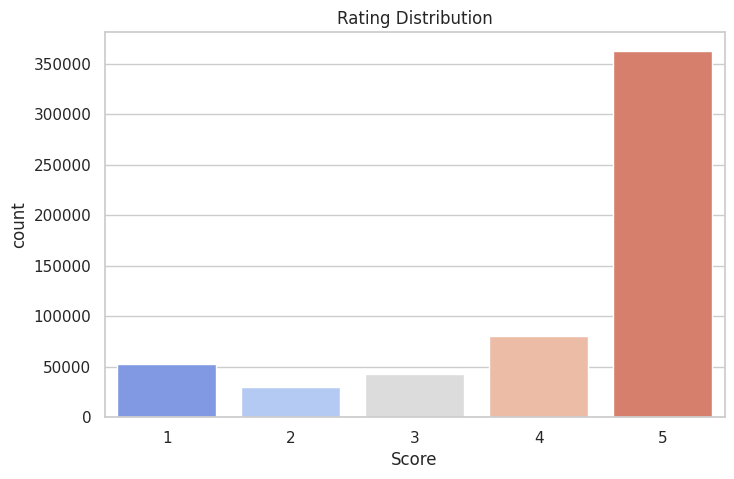

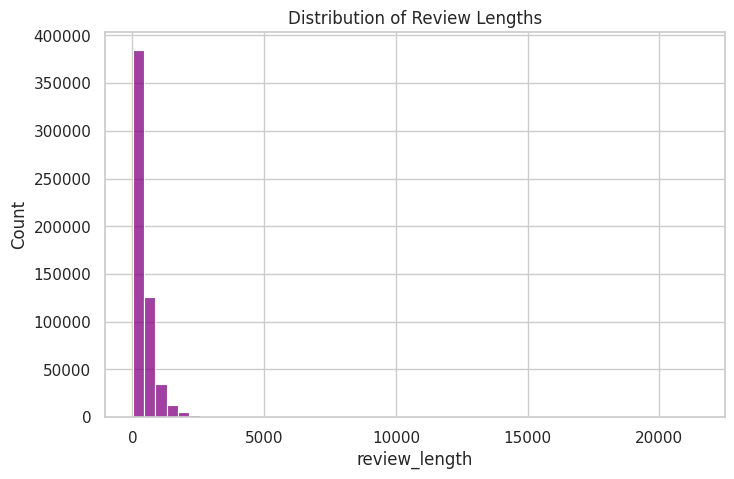

,count
Sentiment,
Positive,443777
Negative,82037
Neutral,42640


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted")

# Rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Score', data=df, palette='coolwarm')
plt.title("Rating Distribution")
plt.show()

# Create review length
df['review_length'] = df['Text'].astype(str).apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, color='purple')
plt.title("Distribution of Review Lengths")
plt.show()

# Sentiment feature
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x>3 else ('Negative' if x<3 else 'Neutral'))
df['Sentiment'].value_counts()


Feature Engineering

In [6]:
import re

# Clean text
df['Text_clean'] = df['Text'].astype(str).str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Convert timestamp
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month


Machine Learning (Sentiment Prediction)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Text_clean'].fillna(''))
y = df['Sentiment']

# Remove rows with NaN or very rare classes
mask = y.isin(['Positive', 'Neutral', 'Negative'])
y = y[mask]
X = X[np.array(mask)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model training
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Model Performance:")
print(classification_report(y_test, y_pred, zero_division=0))


Portfolio Visualizations

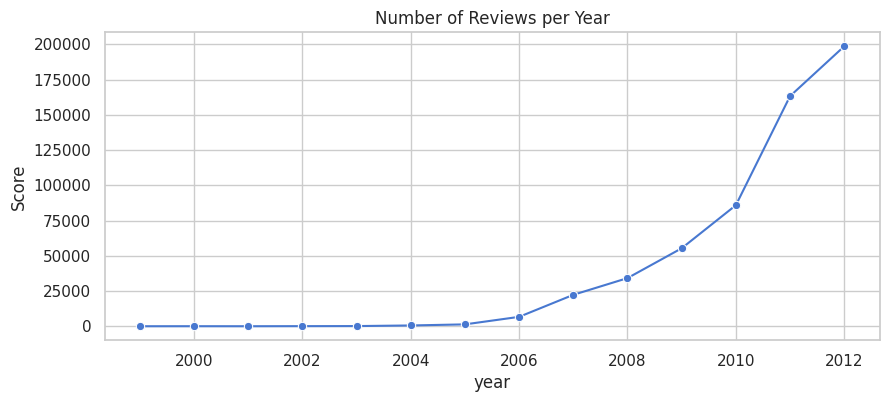

/tmp/ipython-input-1872762266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='review_length', data=df, palette='coolwarm')


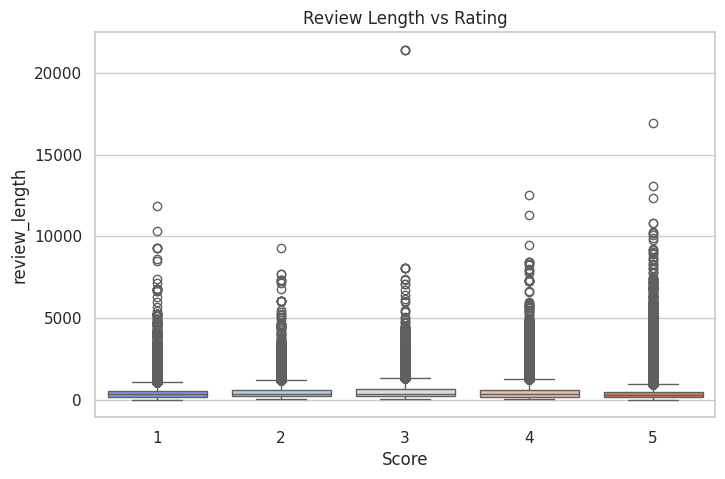

In [8]:
# Reviews per year
yearly = df.groupby('year')['Score'].count().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='Score', data=yearly, marker='o')
plt.title("Number of Reviews per Year")
plt.show()

# Rating vs review length
plt.figure(figsize=(8,5))
sns.boxplot(x='Score', y='review_length', data=df, palette='coolwarm')
plt.title("Review Length vs Rating")
plt.show()
